In [39]:
import pandas as pd
import seaborn as sns

In [40]:
#source: https://finance.yahoo.com/quote/%5EGSPC/history/
sp500_5y_data = pd.read_csv("sp500_9-15-2015_to_9-15-2020.csv")

In [41]:
sp500_5y_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [42]:
sp500_5y_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-15,1955.099976,1983.189941,1954.300049,1978.089966,1978.089966,3239860000
1,2015-09-16,1978.020020,1997.260010,1977.930054,1995.310059,1995.310059,3630680000
2,2015-09-17,1995.329956,2020.859985,1986.729980,1990.199951,1990.199951,4183790000
3,2015-09-18,1989.660034,1989.660034,1953.449951,1958.030029,1958.030029,6021240000
4,2015-09-21,1960.839966,1979.640015,1955.800049,1966.969971,1966.969971,3269350000


In [43]:
sp500_5y_data.drop("Adj Close",axis=1,inplace=True)

In [44]:
sp500_5y_data.shape

(1259, 6)

In [45]:
sp500_5y_data = sp500_5y_data.round(decimals=2)

In [47]:
sp500_5y_data["Prev_Open"] = sp500_5y_data["Open"].shift(+1)
sp500_5y_data["Prev_High"] = sp500_5y_data["High"].shift(+1)
sp500_5y_data["Prev_Low"] = sp500_5y_data["Low"].shift(+1)
sp500_5y_data["Prev_Volume"] = sp500_5y_data["Volume"].shift(+1)
sp500_5y_data["Next_Close"] = sp500_5y_data["Close"].shift(-1)
sp500_5y_data["Next_High"] = sp500_5y_data["High"].shift(-1)

In [48]:
sp500_5y_data.head()

,Date,Open,High,Low,Close,Volume,Prev_Open,Prev_High,Prev_Low,Prev_Volume,Next_Close,Next_High
0,2015-09-15,1955.10,1983.19,1954.30,1978.09,3239860000,NaN,NaN,NaN,NaN,1995.31,1997.26
1,2015-09-16,1978.02,1997.26,1977.93,1995.31,3630680000,1955.10,1983.19,1954.30,3.239860e+09,1990.20,2020.86
2,2015-09-17,1995.33,2020.86,1986.73,1990.20,4183790000,1978.02,1997.26,1977.93,3.630680e+09,1958.03,1989.66
3,2015-09-18,1989.66,1989.66,1953.45,1958.03,6021240000,1995.33,2020.86,1986.73,4.183790e+09,1966.97,1979.64
4,2015-09-21,1960.84,1979.64,1955.80,1966.97,3269350000,1989.66,1989.66,1953.45,6.021240e+09,1942.74,1961.39


In [49]:
sp500_5y_data.dropna()

,Date,Open,High,Low,Close,Volume,Prev_Open,Prev_High,Prev_Low,Prev_Volume,Next_Close,Next_High
1,2015-09-16,1978.02,1997.26,1977.93,1995.31,3630680000,1955.10,1983.19,1954.30,3.239860e+09,1990.20,2020.86
2,2015-09-17,1995.33,2020.86,1986.73,1990.20,4183790000,1978.02,1997.26,1977.93,3.630680e+09,1958.03,1989.66
3,2015-09-18,1989.66,1989.66,1953.45,1958.03,6021240000,1995.33,2020.86,1986.73,4.183790e+09,1966.97,1979.64
4,2015-09-21,1960.84,1979.64,1955.80,1966.97,3269350000,1989.66,1989.66,1953.45,6.021240e+09,1942.74,1961.39
5,2015-09-22,1961.39,1961.39,1929.22,1942.74,3808260000,1960.84,1979.64,1955.80,3.269350e+09,1938.76,1949.52
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2020-09-04,3453.60,3479.15,3349.63,3426.96,4431440000,3564.74,3564.85,3427.41,4.898680e+09,3331.84,3379.97
1254,2020-09-08,3371.88,3379.97,3329.27,3331.84,4665600000,3453.60,3479.15,3349.63,4.431440e+09,3398.96,3424.77
1255,2020-09-09,3369.82,3424.77,3366.84,3398.96,3920830000,3371.88,3379.97,3329.27,4.665600e+09,3339.19,3425.55
1256,2020-09-10,3412.56,3425.55,3329.25,3339.19,4192250000,3369.82,3424.77,3366.84,3.920830e+09,3340.97,3368.95


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test = train_test_split(sp500_5y_data, test_size = 0.2)

In [52]:
X_test

,Date,Open,High,Low,Close,Volume,Prev_Open,Prev_High,Prev_Low,Prev_Volume,Next_Close,Next_High
490,2017-08-24,2447.91,2450.39,2436.19,2438.97,2846590000,2444.88,2448.91,2441.42,2.785290e+09,2443.05,2453.96
852,2019-02-04,2706.49,2724.99,2698.75,2724.87,3359840000,2702.32,2716.66,2696.88,3.759270e+09,2737.70,2738.98
1071,2019-12-16,3183.63,3197.71,3183.63,3191.45,4051790000,3166.65,3182.68,3156.51,3.736870e+09,3192.52,3198.22
1101,2020-01-30,3256.45,3285.91,3242.80,3283.66,3787250000,3289.46,3293.47,3271.89,3.584500e+09,3225.52,3282.33
249,2016-09-09,2169.08,2169.08,2127.81,2127.81,4233960000,2182.76,2184.94,2177.49,3.727840e+09,2159.04,2163.30
...,...,...,...,...,...,...,...,...,...,...,...,...
727,2018-08-03,2829.62,2840.38,2827.37,2840.35,3030390000,2800.48,2829.91,2796.34,3.467380e+09,2850.40,2853.29
47,2015-11-19,2083.70,2086.74,2078.76,2081.24,3628110000,2051.99,2085.31,2051.99,3.926390e+09,2089.17,2097.06
695,2018-06-19,2752.01,2765.05,2743.19,2762.59,3661470000,2765.79,2774.99,2757.12,3.287150e+09,2767.32,2774.86
607,2018-02-12,2636.75,2672.61,2622.45,2656.00,4055790000,2601.78,2638.67,2532.69,5.680070e+09,2662.94,2668.84


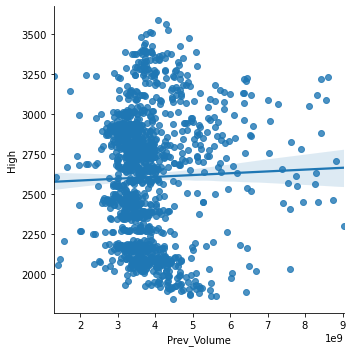

In [59]:
sns.lmplot(x = 'Prev_Volume', y = 'High', data = sp500_5y_data)